# Project Name: Bike Rental Count Prediction uisng ML and H2O Auto ML

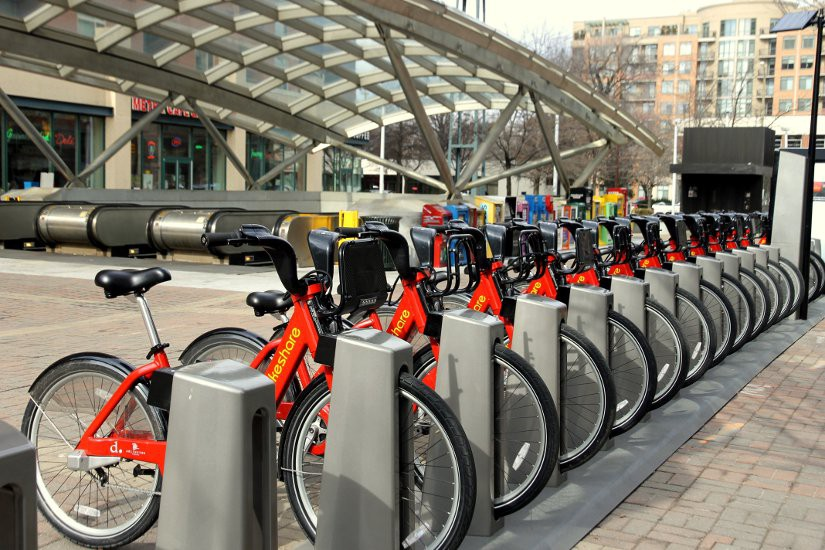

## BackGround:


### Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

### About the Data Set

### Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

### The objective of this Case is to Prediction of bike rental count on daily based on the environmental and seasonal settings.

## Time Line of the Project:
- Importing Libraries and DataSet
- Data Analysis and Preprocessing
- Feature Engineering
- Model Building using ML
- Model Building and Prediction using H2O Auto ML

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Loading the Data Set

In [6]:
df= pd.read_csv("day.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Understanding the Data Set

### The Data Set contains the following information:
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Data Analysis 

In [8]:
df.shape

(731, 16)

In [9]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Let us rename the colums for a better understanding

In [10]:
df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [11]:
df.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Let us convert our Data types of variables to the significant category

In [12]:
df['datetime']=pd.to_datetime(df.datetime)
df['season']=df.season.astype('category')
df['year']=df.year.astype('category')
df['month']=df.month.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weather_condition']=df.weather_condition.astype('category')

In [13]:
df.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
holiday                    category
weekday                    category
workingday                 category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

In [14]:
df.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Handling Missing Values

In [15]:
df.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

### Let us see how the different months and seasons affect the rental counts

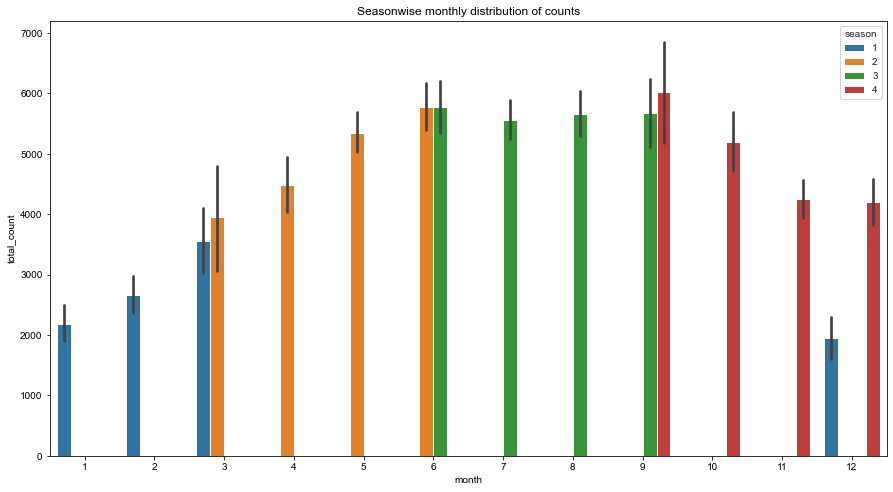

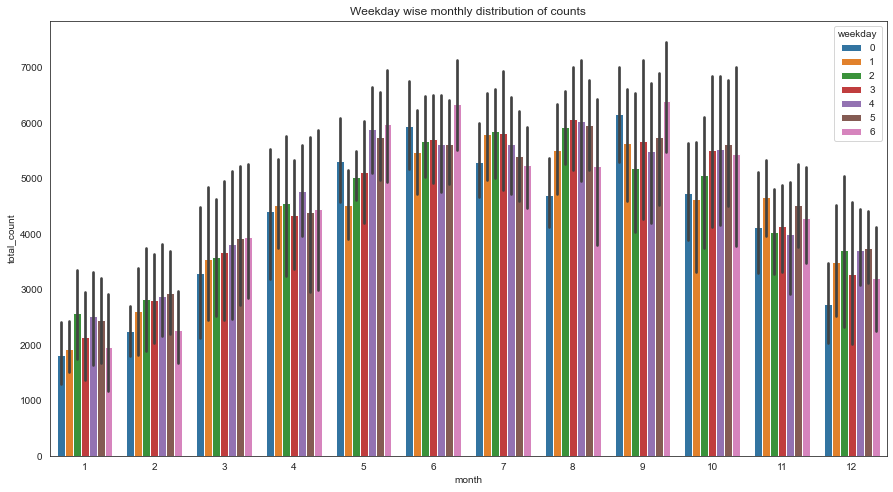

In [16]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=df[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

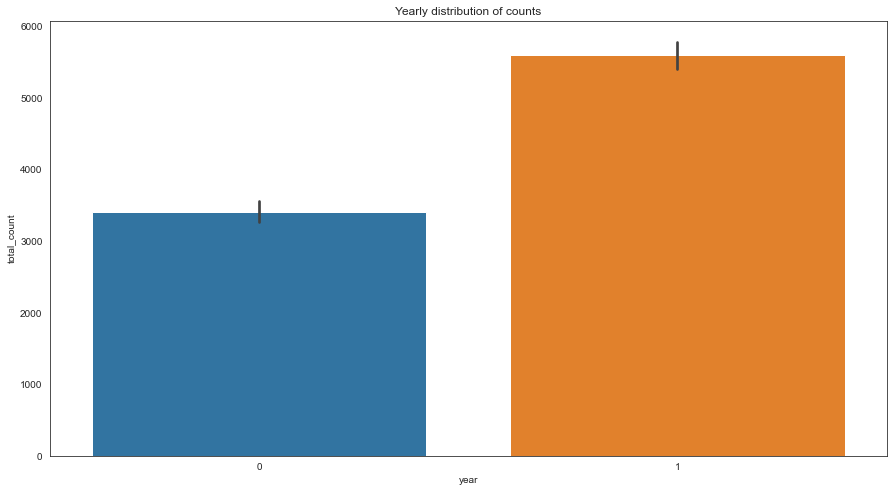

In [17]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.barplot(x='year',y='total_count',data=df[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

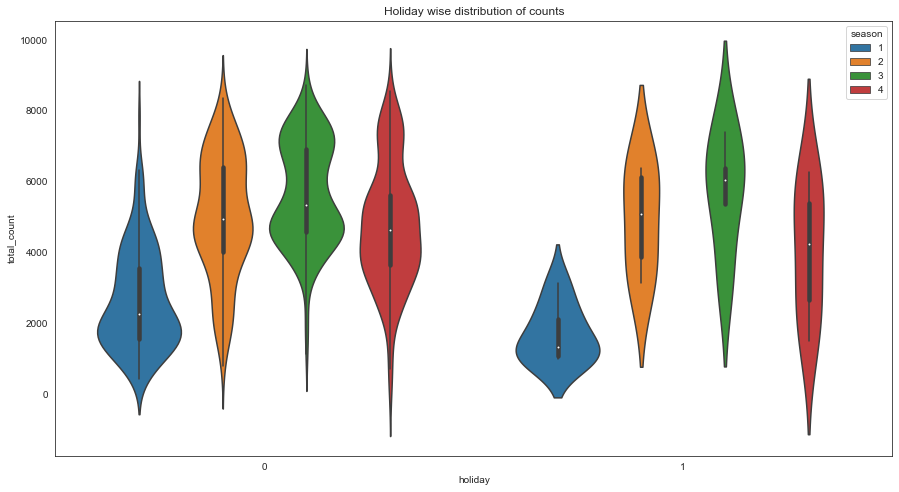

In [18]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.violinplot(data=df,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

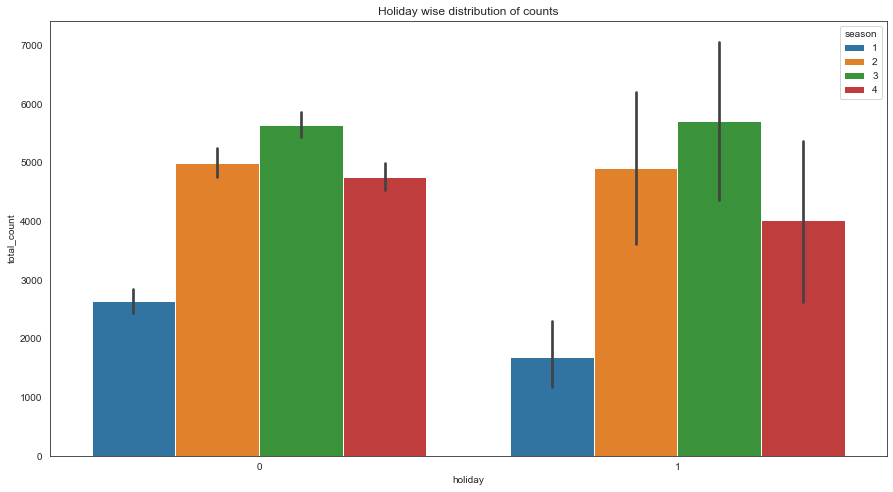

In [19]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=df,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

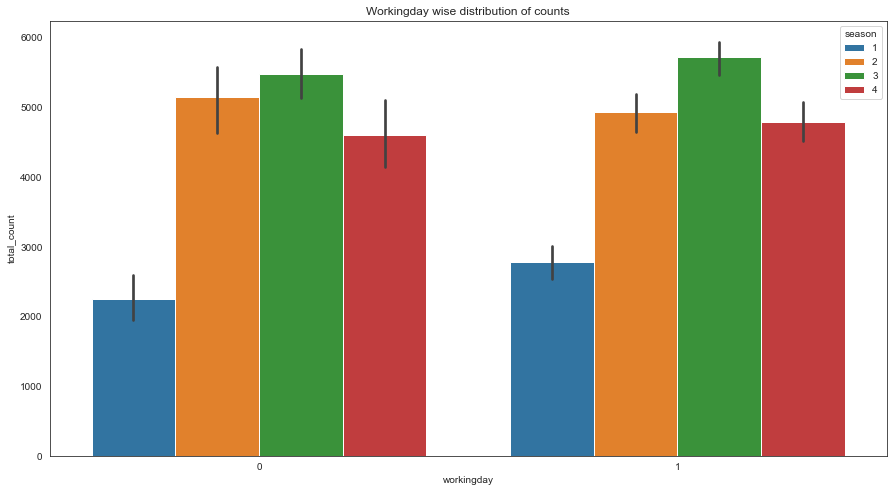

In [20]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=df,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

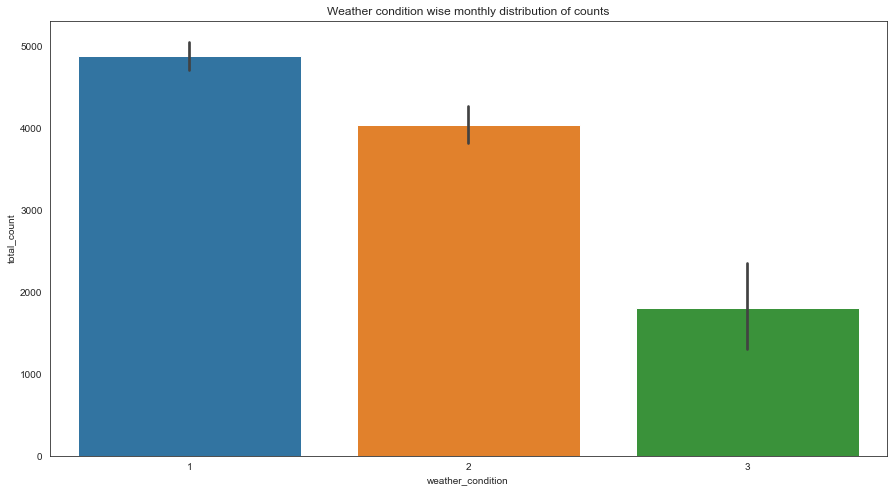

In [21]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=df[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather condition wise monthly distribution of counts')
plt.show()

### Outlier Analysis

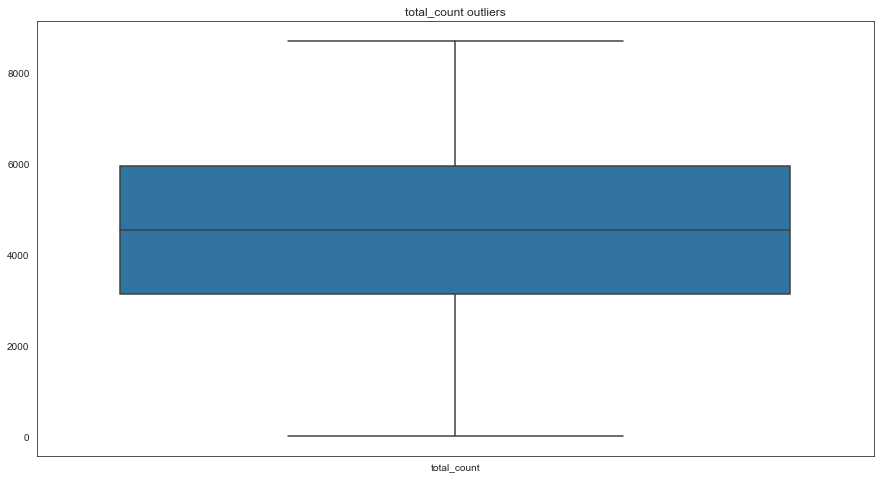

In [22]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=df[['total_count']])
ax.set_title('total_count outliers')
plt.show()

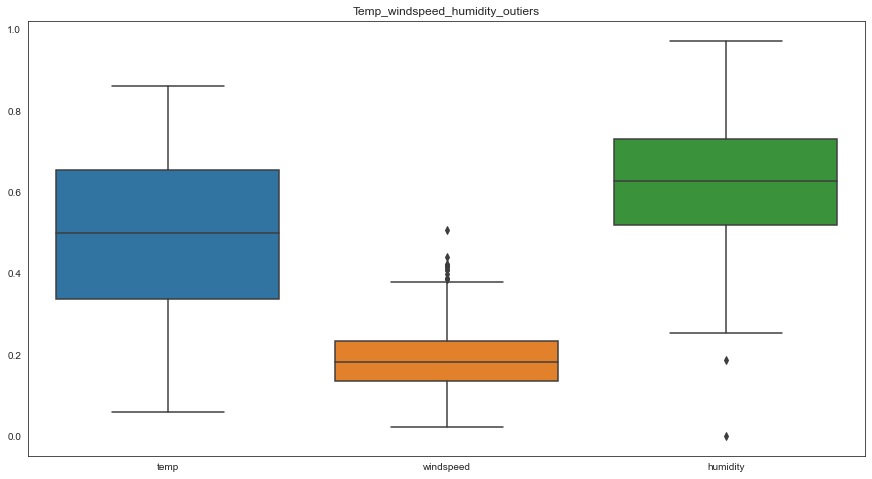

In [23]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=df[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

### Plotting Q-Q Plot

In [24]:
import scipy.stats as stat
import pylab

In [25]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

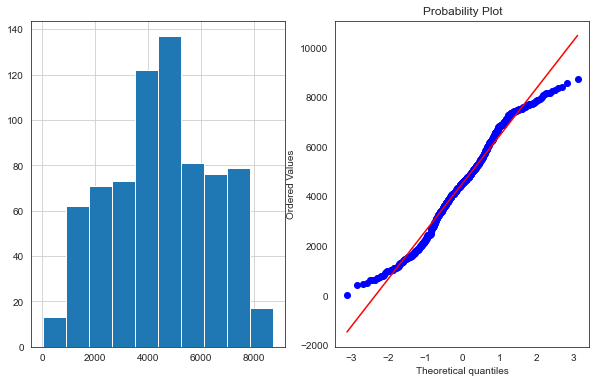

In [26]:
plot_curve(df,'total_count')

### Co Relation Matrix

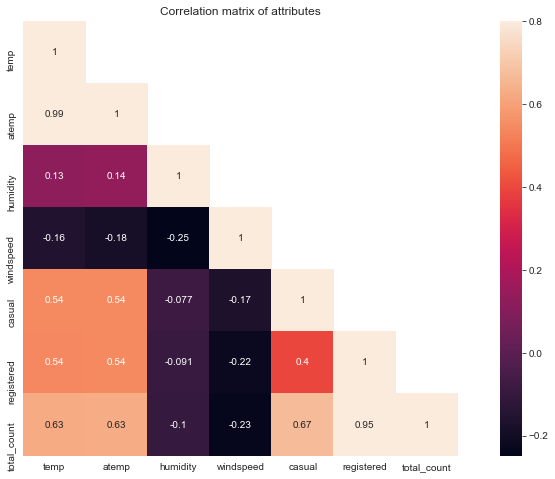

In [27]:
correMtr=df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

### Data Pre Processing

In [28]:
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

### One Hot Encoding

In [31]:
encoded_df =pd.get_dummies(df,columns=cat_attributes)
print('Shape of transfomed dataframe::',encoded_df.shape)
encoded_df.head()

Shape of transfomed dataframe:: (731, 24)


,rec_id,datetime,month,weekday,temp,atemp,humidity,windspeed,casual,registered,...,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,1,2011-01-01,1,6,0.344167,0.363625,0.805833,0.160446,331,654,...,0,1,0,1,0,0,1,0,1,0
1,2,2011-01-02,1,0,0.363478,0.353739,0.696087,0.248539,131,670,...,0,1,0,1,0,0,1,0,1,0
2,3,2011-01-03,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,...,0,1,0,0,1,1,0,0,1,0
3,4,2011-01-04,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,...,0,1,0,0,1,1,0,0,1,0
4,5,2011-01-05,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,...,0,1,0,0,1,1,0,0,1,0


In [32]:
encoded_df=encoded_df.drop('datetime',axis=1)

In [34]:
encoded_df.head()

,rec_id,month,weekday,temp,atemp,humidity,windspeed,casual,registered,total_count,...,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,1,1,6,0.344167,0.363625,0.805833,0.160446,331,654,985,...,0,1,0,1,0,0,1,0,1,0
1,2,1,0,0.363478,0.353739,0.696087,0.248539,131,670,801,...,0,1,0,1,0,0,1,0,1,0
2,3,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,...,0,1,0,0,1,1,0,0,1,0
3,4,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,1562,...,0,1,0,0,1,1,0,0,1,0
4,5,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,1600,...,0,1,0,0,1,1,0,0,1,0


In [35]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [36]:
x= encoded_df.iloc[:,0:-1] ## Independent Features
y= encoded_df.iloc[:,-1] ## Dependent Varibales

In [37]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [39]:
X_train.head()

,rec_id,month,weekday,temp,atemp,humidity,windspeed,casual,registered,total_count,...,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0
223,224,8,5,0.708333,0.654042,0.415000,0.125621,1051,3854,4905,...,1,0,1,0,0,1,1,0,0,1
684,685,11,4,0.321667,0.324492,0.620417,0.152987,320,5125,5445,...,0,1,1,0,0,1,0,1,0,0
685,686,11,5,0.345000,0.347204,0.524583,0.171025,484,5214,5698,...,0,1,1,0,0,1,1,0,0,0
163,164,6,1,0.635000,0.601654,0.494583,0.305350,863,4157,5020,...,0,0,1,0,0,1,1,0,0,1
394,395,1,1,0.269167,0.262625,0.400833,0.215792,126,3498,3624,...,0,0,1,0,0,1,1,0,0,0


### Our data is ready for Model Building

## Model Building

### We will be using the following models in our project:
- Linear Regression
- Random Forest Regressor

## Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
linreg= LinearRegression()

In [42]:
linreg.fit(X_train,y_train)

LinearRegression()

In [43]:
pred= linreg.predict(X_test)

In [44]:
lr=linreg.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',linreg.coef_)
print('Model intercept value :',linreg.intercept_)

Accuracy of the model : 1.0
Model coefficients : [-1.28644168e-17 -5.63159923e-17 -2.95950035e-16  1.18106371e-14
 -1.19165492e-14 -2.82858486e-16 -6.54752744e-16 -6.96867840e-13
 -6.96870207e-13  6.96870362e-13 -1.89826409e-16 -2.12100952e-16
 -2.57451214e-16 -9.64671313e-17  8.15909712e-17 -1.12815994e-16
  9.53369882e-17  4.34408904e-17 -2.24728172e-16 -2.12576625e-16
 -2.68044238e-16 -1.00000000e+00]
Model intercept value : 1.000000000000004


In [45]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 2.623810236189977e-15
Mean absolute error : 2.1689720726540557e-15


<AxesSubplot:xlabel='year_1'>

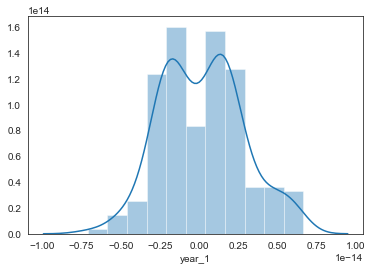

In [47]:
sns.distplot(y_test-pred)

## Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf=RandomForestRegressor(n_estimators=200)

In [50]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [51]:
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9998810488571866


In [52]:
rf_pred=rf.predict(X_test)

In [53]:
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 0.0024073750321573404
Mean absolute error : 0.0002045454545454547


# Using Auto ML

## H2O Auto ML

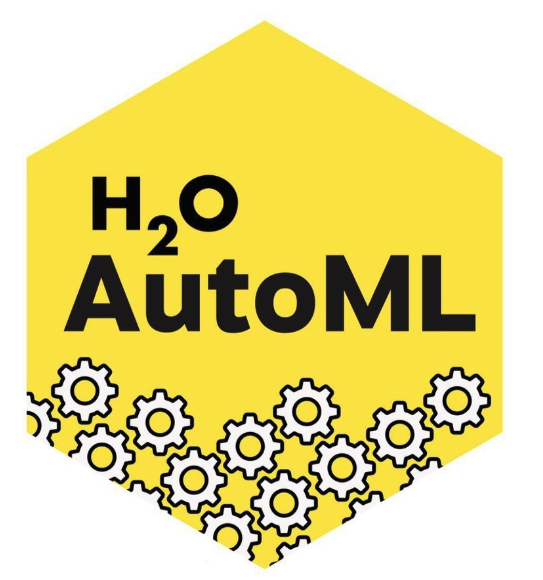

### H2O is a fully open-source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms, including gradient boosted machines, generalized linear models, deep learning, and many more.

### Installing H2O Auto ML

In [54]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [55]:
!pip install h2o

  Created wheel for h2o: filename=h2o-3.36.1.4-py2.py3-none-any.whl size=177128127 sha256=7e126fedcb7622b6594b151ea88b5da333e092434f0ec7129b2be612de074960
  Stored in directory: c:\users\mani\appdata\local\pip\cache\wheels\f7\74\3d\645d819eab17de3e8158807b48d75ffff86f58a3ec8a89c66c
Successfully built h2o


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


## Importing the H2O Python module and H2OAutoML class

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='2G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 18.0.2+9-61, mixed mode, sharing)
  Starting server from C:\ProgramData\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\MANI\AppData\Local\Temp\tmpbhuskc7k
  JVM stdout: C:\Users\MANI\AppData\Local\Temp\tmpbhuskc7k\h2o_MANI_started_from_python.out
  JVM stderr: C:\Users\MANI\AppData\Local\Temp\tmpbhuskc7k\h2o_MANI_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_MANI_aumapt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


### Loading the data

In [2]:
df = h2o.import_file("day.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
df.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01 00:00:00,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02 00:00:00,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03 00:00:00,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04 00:00:00,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05 00:00:00,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
6,2011-01-06 00:00:00,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,2011-01-07 00:00:00,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
8,2011-01-08 00:00:00,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
9,2011-01-09 00:00:00,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
10,2011-01-10 00:00:00,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


## H2O auto ml can do all the data preprocessing techniques

In [4]:
df_train,df_test= df.split_frame(ratios=[.8])

### Splitting the data

In [6]:
df_train.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2,2011-01-02 00:00:00,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03 00:00:00,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04 00:00:00,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
6,2011-01-06 00:00:00,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,2011-01-07 00:00:00,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
9,2011-01-09 00:00:00,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
10,2011-01-10 00:00:00,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321
11,2011-01-11 00:00:00,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263
12,2011-01-12 00:00:00,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162
13,2011-01-13 00:00:00,1,0,1,0,4,1,1,0.165,0.150883,0.470417,0.301,38,1368,1406


In [7]:
y = "cnt"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('casual')
x.remove('registered')

### Defining the model

In [8]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

### Fitting the model

In [9]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
17:23:22.849: Project: AutoML_1_20220811_172322
17:23:22.853: Setting stopping tolerance adaptively based on the training frame: 0.041239304942116126
17:23:22.854: Build control seed: 10
17:23:22.855: training frame: Frame key: AutoML_1_20220811_172322_training_py_3_sid_9edb    cols: 16    rows: 588  chunks: 1    size: 22518  checksum: 7609738281035862060
17:23:22.855: validation frame: NULL
17:23:22.856: leaderboard frame: NULL
17:23:22.856: blending frame: NULL
17:23:22.856: response column: cnt
17:23:22.856: fold column: null
17:23:22.857: weights column: null
17:23:22.885: AutoML: XGBoost is not available; skipping it.
17:23:22.893: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, 

,,mean,sd,cv_1_valid,cv_2_valid
0,mae,4.257371e+02,2.310208e+01,4.420728e+02,4.094015e+02
1,mean_residual_deviance,3.622377e+05,2.439993e+04,3.794911e+05,3.449843e+05
2,mse,3.622377e+05,2.439993e+04,3.794911e+05,3.449843e+05
3,null_deviance,1.113888e+09,1.590209e+08,1.226333e+09,1.001443e+09
4,r2,9.038634e-01,6.826250e-03,9.086903e-01,8.990366e-01
5,residual_deviance,1.065151e+08,7.685861e+06,1.119499e+08,1.010804e+08
6,rmse,6.016911e+02,2.027613e+01,6.160284e+02,5.873537e+02
7,rmsle,2.171567e-01,1.887635e-02,2.305043e-01,2.038091e-01


### Seeing the Leaderboard

In [10]:
lb = aml.leaderboard

In [11]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20220811_172322,601.914,362300,425.81,0.217581,362300
StackedEnsemble_AllModels_1_AutoML_1_20220811_172322,602.456,362953,426.472,0.219831,362953
GBM_2_AutoML_1_20220811_172322,616.498,380070,436.734,0.224038,380070
GBM_4_AutoML_1_20220811_172322,619.41,383669,443.104,0.226318,383669
GBM_3_AutoML_1_20220811_172322,634.12,402109,450.257,0.230344,402109
DRF_1_AutoML_1_20220811_172322,646.241,417628,453.86,0.237706,417628
XRT_1_AutoML_1_20220811_172322,654.936,428942,466.199,0.24086,428942
GBM_5_AutoML_1_20220811_172322,668.517,446915,462.475,0.237873,446915
GBM_grid_1_AutoML_1_20220811_172322_model_1,693.226,480562,493.845,0.249317,480562
DeepLearning_1_AutoML_1_20220811_172322,768.178,590098,583.783,0.24564,590098


## Getting all the model ids

In [12]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [13]:
model_ids

['StackedEnsemble_BestOfFamily_1_AutoML_1_20220811_172322',
 'StackedEnsemble_AllModels_1_AutoML_1_20220811_172322',
 'GBM_2_AutoML_1_20220811_172322',
 'GBM_4_AutoML_1_20220811_172322',
 'GBM_3_AutoML_1_20220811_172322',
 'DRF_1_AutoML_1_20220811_172322',
 'XRT_1_AutoML_1_20220811_172322',
 'GBM_5_AutoML_1_20220811_172322',
 'GBM_grid_1_AutoML_1_20220811_172322_model_1',
 'DeepLearning_1_AutoML_1_20220811_172322',
 'GBM_1_AutoML_1_20220811_172322',
 'GLM_1_AutoML_1_20220811_172322']

In [14]:
aml.leader.model_performance(df_test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 533610.2160426124
RMSE: 730.4862873747956
MAE: 429.49288230228507
RMSLE: 0.4788879720523651
R^2: 0.8508751758407268
Mean Residual Deviance: 533610.2160426124
Null degrees of freedom: 142
Residual degrees of freedom: 138
Null deviance: 512307829.3055557
Residual deviance: 76306260.89409359
AIC: 2303.617611900298


### Getting the model details for best performing model

In [15]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20220811_172322

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 96334.5699255936
RMSE: 310.3781079998936
MAE: 228.19310119345764
RMSLE: 0.12212613296668563
R^2: 0.97456852917923
Mean Residual Deviance: 96334.5699255936
Null degrees of freedom: 587
Residual degrees of freedom: 583
Null deviance: 2227347663.666667
Residual deviance: 56644727.11624904
AIC: 8428.31423383455

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 362300.49723243056
RMSE: 601.9140281073624
MAE: 425.8100100270516
RMSLE: 0.21758064839882493
R^2: 0.9043558866683731
Mean Residual Deviance: 362300.49723243056
Null degrees of freedom: 587
Residual degrees of freedom: 584
Null deviance: 2227775733.8623095
Residual deviance: 213032692.37266916
AIC: 9205.206513645975

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid
0,mae,4.257371e+02,2.310208e+01,4.420728e+02,4.094015e+02
1,mean_residual_deviance,3.622377e+05,2.439993e+04,3.794911e+05,3.449843e+05
2,mse,3.622377e+05,2.439993e+04,3.794911e+05,3.449843e+05
3,null_deviance,1.113888e+09,1.590209e+08,1.226333e+09,1.001443e+09
4,r2,9.038634e-01,6.826250e-03,9.086903e-01,8.990366e-01
5,residual_deviance,1.065151e+08,7.685861e+06,1.119499e+08,1.010804e+08
6,rmse,6.016911e+02,2.027613e+01,6.160284e+02,5.873537e+02
7,rmsle,2.171567e-01,1.887635e-02,2.305043e-01,2.038091e-01


In [16]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_1_AutoML_1_20220811_172322',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_1_AutoML_1_20220811_172322'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20220811_172322_training_py_3_sid_9edb',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20220811_172322_training_py_3_sid_9edb'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20220811_172322_training_py_3_sid_9edb',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20220811_172322_training_py_3_sid_9edb'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
  

In [17]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20220811_172322

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 96334.5699255936
RMSE: 310.3781079998936
MAE: 228.19310119345764
RMSLE: 0.12212613296668563
R^2: 0.97456852917923
Mean Residual Deviance: 96334.5699255936
Null degrees of freedom: 587
Residual degrees of freedom: 583
Null deviance: 2227347663.666667
Residual deviance: 56644727.11624904
AIC: 8428.31423383455

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 362300.49723243056
RMSE: 601.9140281073624
MAE: 425.8100100270516
RMSLE: 0.21758064839882493
R^2: 0.9043558866683731
Mean Residual Deviance: 362300.49723243056
Null degrees of freedom: 587
Residual degrees of freedom: 584
Null deviance: 2227775733.8623095
Residual deviance: 213032692.37266916
AIC: 9205.206513645975

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid
0,mae,4.257371e+02,2.310208e+01,4.420728e+02,4.094015e+02
1,mean_residual_deviance,3.622377e+05,2.439993e+04,3.794911e+05,3.449843e+05
2,mse,3.622377e+05,2.439993e+04,3.794911e+05,3.449843e+05
3,null_deviance,1.113888e+09,1.590209e+08,1.226333e+09,1.001443e+09
4,r2,9.038634e-01,6.826250e-03,9.086903e-01,8.990366e-01
5,residual_deviance,1.065151e+08,7.685861e+06,1.119499e+08,1.010804e+08
6,rmse,6.016911e+02,2.027613e+01,6.160284e+02,5.873537e+02
7,rmsle,2.171567e-01,1.887635e-02,2.305043e-01,2.038091e-01


In [18]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [19]:
y_pred

predict
1321.44
1451.56
1058.94
1389.89
1079.35
1107.1
1113.76
1320.11
1549.41
1590.12
